# Segunda parte: Aspectos prácticos de las redes neuronales

En esta segunda parte, vamos a continuar desarrollando el problema de Fashion MNIST, con el objetivo de entender los aspectos prácticos del entrenamiento de redes neuronales que hemos visto en el Tema 4.

El código utilizado para contestar tiene que quedar claramente reflejado en el Notebook. Puedes crear nuevas cells si así lo deseas para estructurar tu código y sus salidas. A la hora de entregar el notebook, **asegúrate de que los resultados de ejecutar tu código han quedado guardados**. 

In [3]:
# Puedes añadir todos los imports adicionales que necesites aquí
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
import tensorflow as tf

import matplotlib
import matplotlib.pyplot as plt

#### Obtención de los datos y pre-processing

In [4]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

4423680/4422102 [==============================] - 0s 0us/step


## Consideraciones iniciales

### Train-validation-test split

En todos los modelos que entrenemos, vamos a partir los datos de training (x_train) en dos sets: training y validación. De este modo, al final tendremos tres datasets distintos: training, validation, y test. Esta es una estrategia común en el aprendizaje automático, en la que los datos de test (o held-out data) se 
"esconden" hasta el final. Los datos de validación se utilizan para estimar cómo de bien están funcionando nuestros modelos y para observar si estamos cayendo en overfitting. Esto nos permite cambiar hiperparámetros y probar distintas arquitecturas **sabiendo que no estamos utilizando información del test set para "optimizar" los resultados en éste** (si eligiéramos nuestro mejor modelo en base a los resultados de test, estaríamos "haciendo trampas", ya que se ha utilizado la información contenida en éste para elegir el modelo y las métricas reportadas serían optimistas).

Para utilizar un split training-validation data durante el entrenamiento, podemos partir nosotros mismos los datos o dejar que Keras lo haga. Podéis ver cómo hacer estas particiones en la documentación de *fit*.

**Requisito: En todos los entrenamientos de esta práctica, se requiere utilizar el 20% de los datos en x_train como  conjunto de datos de validación**

### Un error común con modelos de Keras

En esta práctica entrenaremos varios modelos para comparar resultados. Un error común en Keras es no instanciar un nuevo modelo cada vez que hacemos un nuevo entrenamiento. Al hacer

*model = Sequential()*

*model.add(lo que sea)  # Definición del modelo*

*model.fit()*

si queremos entrenar un nuevo modelo o el mismo modelo otra vez, es necesario volver a inicializar el modelo con model = Sequential(). Si olvidamos este paso y volvemos a hacer fit(), el modelo seguirá entrenando por donde se quedó en el último fit().

### Análisis de resultados 

A la hora de escribir las respuestas y los análisis pedidos, es importante presentar las conclusiones de manera adecuada a partir de lo visto en nuestros experimentos. Los Jupyter Notebook son una herramienta imprescindible para *data scientists* e ingenieros de Machine Learning para presentar los resultados, incluyendo soporte para incluir gráficas y elementos visuales. Podéis explicar vuestras observaciones del modo que consideréis adecuado, si bien recomendamos la utilización de gráficas para evaluar los entrenamientos y comparar resultados.

Como ayuda, las siguientes funciones pueden resultar interesantes a la hora de evaluar resultados. Todas ellas utilizan el objeto *history* que podéis obtener como salida del método *fit()* de Keras:

history = model.fit(x_train, y_train, ...)

Por supuesto, podéis modificarlas y utilizarlas como prefiráis para crear vuestros propios informes.

In [5]:
def plot_acc(history, title="Model Accuracy"):
    """Imprime una gráfica mostrando la accuracy por epoch obtenida en un entrenamiento"""
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()
    
def plot_loss(history, title="Model Loss"):
    """Imprime una gráfica mostrando la pérdida por epoch obtenida en un entrenamiento"""
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper right')
    plt.show()
    
def plot_compare_losses(history1, history2, name1="Red 1",
                        name2="Red 2", title="Graph title"):
    """Compara losses de dos entrenamientos con nombres name1 y name2"""
    plt.plot(history1.history['loss'], color="green")
    plt.plot(history1.history['val_loss'], 'r--', color="green")
    plt.plot(history2.history['loss'], color="blue")
    plt.plot(history2.history['val_loss'], 'r--', color="blue")
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train ' + name1, 'Val ' + name1, 
                'Train ' + name2, 'Val ' + name2],
               loc='upper right')
    plt.show()
    
def plot_compare_accs(history1, history2, name1="Red 1",
                      name2="Red 2", title="Graph title"):
    """Compara accuracies de dos entrenamientos con nombres name1 y name2"""
    plt.plot(history1.history['accuracy'], color="green")
    plt.plot(history1.history['val_accuracy'], 'r--', color="green")
    plt.plot(history2.history['accuracy'], color="blue")
    plt.plot(history2.history['val_accuracy'], 'r--', color="blue")
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train ' + name1, 'Val ' + name1, 
                'Train ' + name2, 'Val ' + name2], 
               loc='lower right')
    plt.show()
    
# Nota: podéis cambiar los números aquí presentes y ejecutar esta línea si queréis cambiar el tamaño
# de las gráficas
# matplotlib.rcParams['figure.figsize'] = [8, 8]


## 1. Unidades de activación

En este ejercicio, vamos a evaluar la importancia de utilizar las unidades de activación adecuadas. Como hemos visto en clase, funciones de activación como sigmoid han dejado de utilizarse en favor de otras unidades como ReLU.

**Ejercicio 1 *(1.25 puntos)***: Partiendo de una red sencilla como la desarrollada en el Trabajo 1, escribir un breve análisis comparando la utilización de unidades sigmoid y ReLU (por ejemplo, se pueden comentar aspectos como velocidad de convergencia, métricas obtenidas...). Explicar por qué pueden darse estas diferencias. Opcionalmente, comparar con otras activaciones disponibles en Keras.

*Pista: Usando redes más grandes se hace más sencillo apreciar las diferencias. Es mejor utilizar al menos 3 o 4 capas densas.*

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
750/750 [==============================] - 4s 5ms/step - loss: 1.8557 - accuracy: 0.4866 - val_loss: 1.0881 - val_accuracy: 0.7215
Epoch 2/30
750/750 [==============================] - 4s 5ms/step - loss: 1.0176 - accuracy: 0.7198 - val_loss: 0.8406 - val_accuracy: 0.7399
Epoch 3/30
750/750 [==============================] - 4s 5ms/step - loss: 0.8229 - accuracy: 0.7

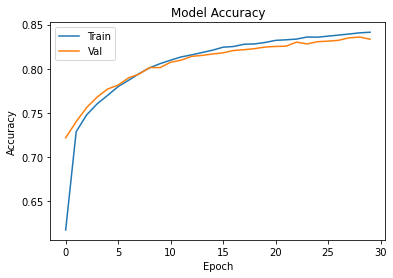

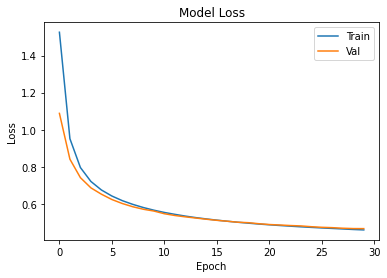

In [6]:
model= Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(Dense(512, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))
model.summary()

model.compile(loss="sparse_categorical_crossentropy",
              optimizer= "sgd",
              metrics =["accuracy"])

# Para utilizar el 20% para validación vamos a poner que realizen un split de 0,2
history_sigmoid = model.fit(x_train,y_train, epochs=30, verbose=1, batch_size=64, validation_split=0.2)
plot_acc(history_sigmoid)
plot_loss(history_sigmoid)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
750/750 [==============================] - 4s 5ms/step - loss: 1.1864 - accuracy: 0.6401 - val_loss: 0.6375 - val_accuracy: 0.7939
Epoch 2/30
750/750 [==============================] - 4s 5ms/step - loss: 0.6168 - accuracy: 0.8014 - val_loss: 0.5723 - val_accuracy: 0.8036
Epoch 3/30
750/750 [==============================] - 4s 5ms/step - loss: 0.5344 - accuracy: 0

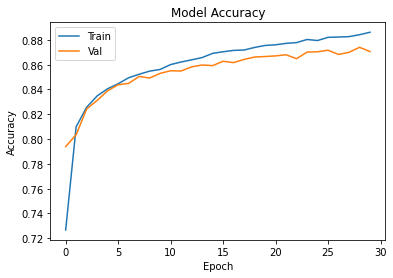

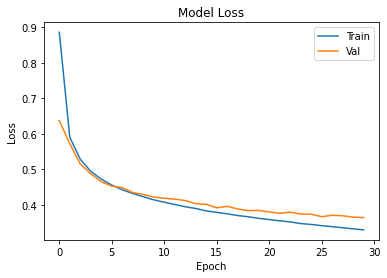

In [7]:
model= Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(Dense(512, activation="relu"))
model.add(Dense(10, activation="softmax"))
model.summary()

model.compile(loss="sparse_categorical_crossentropy",
              optimizer= "sgd",
              metrics =["accuracy"])

# Para utilizar el 20% para validación vamos a poner que realizen un split de 0,2
history_relu = model.fit(x_train,y_train, epochs=30, verbose=1, batch_size=64, validation_split=0.2)
plot_acc(history_relu)
plot_loss(history_relu)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
750/750 [==============================] - 4s 5ms/step - loss: 1.1098 - accuracy: 0.6471 - val_loss: 0.6135 - val_accuracy: 0.7974
Epoch 2/30
750/750 [==============================] - 4s 5ms/step - loss: 0.5849 - accuracy: 0.8092 - val_loss: 0.5379 - val_accuracy: 0.8157
Epoch 3/30
750/750 [==============================] - 4s 5ms/step - loss: 0.5218 - accuracy: 0

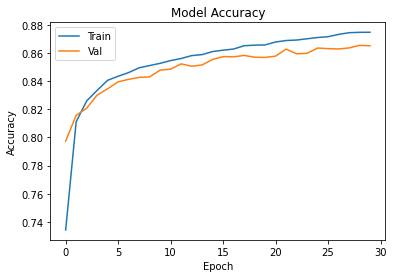

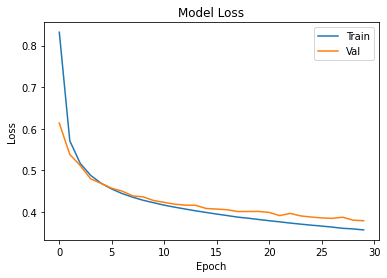

In [8]:
model= Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(Dense(512, activation="tanh"))
model.add(Dense(10, activation="softmax"))
model.summary()

model.compile(loss="sparse_categorical_crossentropy",
              optimizer= "sgd",
              metrics =["accuracy"])

# Para utilizar el 20% para validación vamos a poner que realizen un split de 0,2
history_tanh = model.fit(x_train,y_train, epochs=30, verbose=1, batch_size=64, validation_split=0.2)
plot_acc(history_tanh)
plot_loss(history_tanh)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
750/750 [==============================] - 4s 5ms/step - loss: 1.1214 - accuracy: 0.6442 - val_loss: 0.6177 - val_accuracy: 0.7897
Epoch 2/30
750/750 [==============================] - 4s 5ms/step - loss: 0.5879 - accuracy: 0.8074 - val_loss: 0.5362 - val_accuracy: 0.8198
Epoch 3/30
750/750 [==============================] - 4s 5ms/step - loss: 0.5306 - accuracy: 0

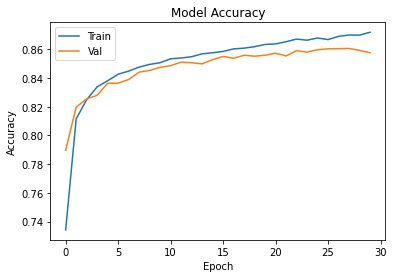

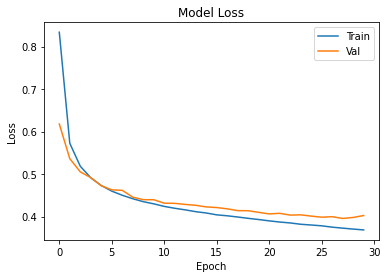

In [9]:
model= Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(Dense(512, activation="elu"))
model.add(Dense(10, activation="softmax"))
model.summary()

model.compile(loss="sparse_categorical_crossentropy",
              optimizer= "sgd",
              metrics =["accuracy"])

# Para utilizar el 20% para validación vamos a poner que realizen un split de 0,2
history_elu = model.fit(x_train,y_train, epochs=30, verbose=1, batch_size=64, validation_split=0.2)
plot_acc(history_elu)
plot_loss(history_elu)

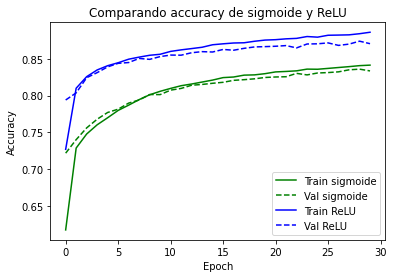

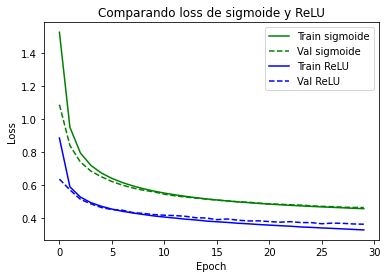

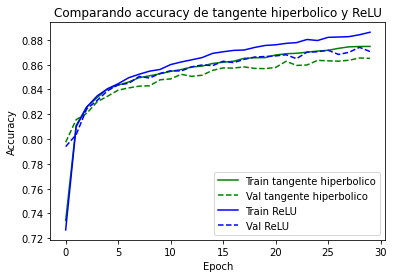

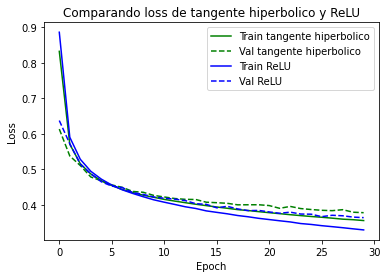

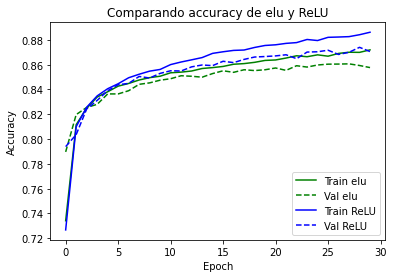

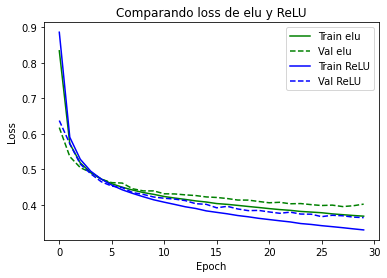

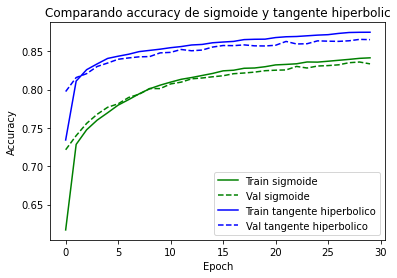

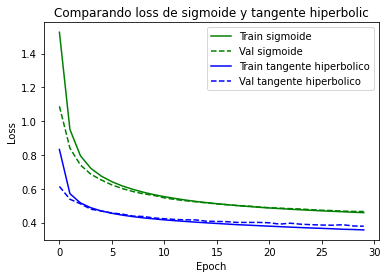

In [10]:
plot_compare_accs(history_sigmoid,history_relu,name1='sigmoide', name2='ReLU',title='Comparando accuracy de sigmoide y ReLU')
plot_compare_losses(history_sigmoid,history_relu,name1='sigmoide', name2='ReLU',title='Comparando loss de sigmoide y ReLU')

plot_compare_accs(history_tanh,history_relu,name1='tangente hiperbolico', name2='ReLU',title='Comparando accuracy de tangente hiperbolico y ReLU')
plot_compare_losses(history_tanh,history_relu,name1='tangente hiperbolico', name2='ReLU',title='Comparando loss de tangente hiperbolico y ReLU')

plot_compare_accs(history_elu,history_relu,name1='elu', name2='ReLU',title='Comparando accuracy de elu y ReLU')
plot_compare_losses(history_elu,history_relu,name1='elu', name2='ReLU',title='Comparando loss de elu y ReLU')

plot_compare_accs(history_sigmoid,history_tanh,name1='sigmoide', name2='tangente hiperbolico',title='Comparando accuracy de sigmoide y tangente hiperbolic')
plot_compare_losses(history_sigmoid,history_tanh,name1='sigmoide', name2='tangente hiperbolico',title='Comparando loss de sigmoide y tangente hiperbolic')

Si comparamos las gráficas obtenidas después de entrenar todas las redes, se puede ver claramente que la curva de aprendizaje de la activación ReLU y tangente hiperbólica son las que dan los mejores resultados aunque no hay una gran diferencia entre ellas. La activación ReLU es superior a la de la activación sigmoid o tangente hiperbólica. 

## 2. Inicialización de parámetros

En este ejercicio, vamos a evaluar la importancia de una correcta inicialización de parámetros en una red neuronal.

**Ejercicio 2 *(1.25 puntos)***: Partiendo de una red similar a la del ejercicio anterior (usando ya ReLUs), comentar las diferencias que se aprecian en el entrenamiento al utilizar distintas estrategias de inicialización de parámetros. Para ello, inicializar todas las capas con las siguientes estrategias, disponibles en Keras, y analizar sus diferencias:

* Inicialización con ceros.
* Inicialización con una variable aleatoria normal.
* Inicialización con los valores por defecto de Keras para una capa Dense (estrategia *glorot uniform*)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_9 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_10 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                330       
Total params: 472,042
Trainable params: 472,042
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
750/750 [==============================] - 5s 6ms/step - loss: 2.3026 - accuracy: 0.0980 - val_loss: 2.

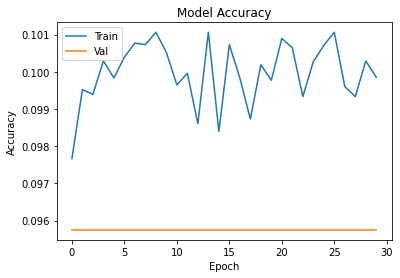

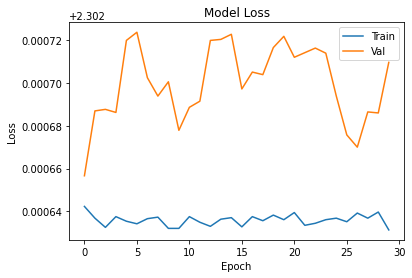

In [11]:
model= Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(Dense(512, activation="relu", kernel_initializer='zeros'))
model.add(Dense(128, activation="relu", kernel_initializer='zeros'))
model.add(Dense(32, activation="relu", kernel_initializer='zeros'))
model.add(Dense(10, activation="softmax", kernel_initializer='zeros'))
model.summary()

model.compile(loss="sparse_categorical_crossentropy",
              optimizer= "sgd",
              metrics =["accuracy"])

# Para utilizar el 20% para validación vamos a poner que realizen un split de 0,2
history_relu_zero = model.fit(x_train,y_train, epochs=30, verbose=1, batch_size=64, validation_split=0.2)
plot_acc(history_relu_zero)
plot_loss(history_relu_zero)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_13 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_14 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_15 (Dense)             (None, 10)                330       
Total params: 472,042
Trainable params: 472,042
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
750/750 [==============================] - 5s 6ms/step - loss: 2.1121 - accuracy: 0.2261 - val_loss: 0.

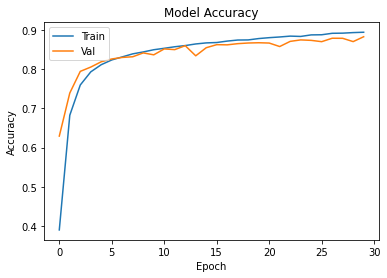

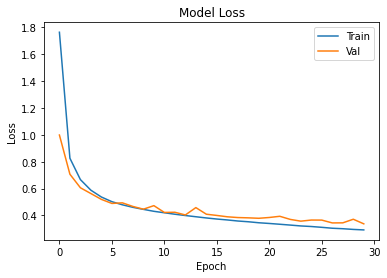

In [12]:
model= Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(Dense(512, activation="relu", kernel_initializer='random_normal'))
model.add(Dense(128, activation="relu", kernel_initializer='random_normal'))
model.add(Dense(32, activation="relu", kernel_initializer='random_normal'))
model.add(Dense(10, activation="softmax", kernel_initializer='random_normal'))
model.summary()

model.compile(loss="sparse_categorical_crossentropy",
              optimizer= "sgd",
              metrics =["accuracy"])

# Para utilizar el 20% para validación vamos a poner que realizen un split de 0,2
history_relu_rand = model.fit(x_train,y_train, epochs=30, verbose=1, batch_size=64, validation_split=0.2)
plot_acc(history_relu_rand)
plot_loss(history_relu_rand)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_17 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_18 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_19 (Dense)             (None, 10)                330       
Total params: 472,042
Trainable params: 472,042
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
750/750 [==============================] - 4s 6ms/step - loss: 1.2725 - accuracy: 0.5901 - val_loss: 0.

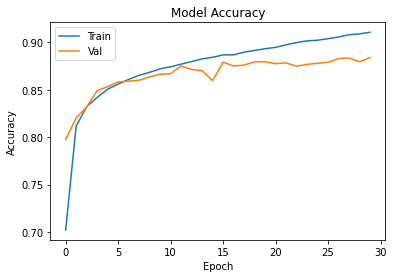

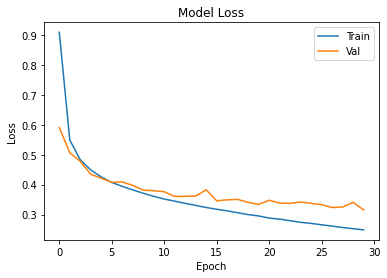

In [13]:

model= Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(Dense(512, activation="relu", kernel_initializer='glorot_uniform'))
model.add(Dense(128, activation="relu", kernel_initializer='glorot_uniform'))
model.add(Dense(32, activation="relu", kernel_initializer='glorot_uniform'))
model.add(Dense(10, activation="softmax", kernel_initializer='glorot_uniform'))
model.summary()

model.compile(loss="sparse_categorical_crossentropy",
              optimizer= "sgd",
              metrics =["accuracy"])

# Para utilizar el 20% para validación vamos a poner que realizen un split de 0,2
history_relu_glorot = model.fit(x_train,y_train, epochs=30, verbose=1, batch_size=64, validation_split=0.2)
plot_acc(history_relu_glorot)
plot_loss(history_relu_glorot)

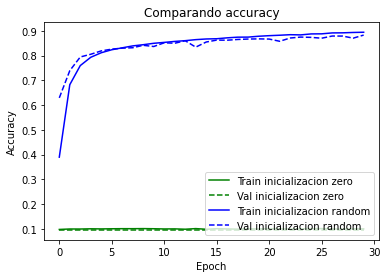

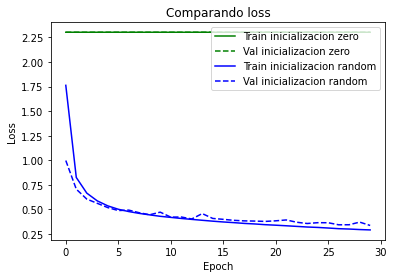

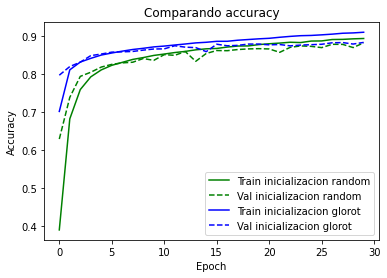

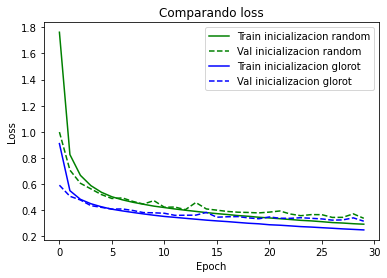

In [14]:
plot_compare_accs(history_relu_zero,history_relu_rand,name1='inicializacion zero', name2='inicializacion random',title='Comparando accuracy')
plot_compare_losses(history_relu_zero,history_relu_rand,name1='inicializacion zero', name2='inicializacion random',title='Comparando loss')

plot_compare_accs(history_relu_rand,history_relu_glorot,name1='inicializacion random', name2='inicializacion glorot',title='Comparando accuracy')
plot_compare_losses(history_relu_rand,history_relu_glorot,name1='inicializacion random', name2='inicializacion glorot',title='Comparando loss')

Se puede ver en las gráficas de la celda anterior que la inicialización a zero no funciona porque las células se mueren y ya no se pueden entrenar si no se cambian los parametros de pesos. Por eso es mejor utilizar las inicializaciones posteriores. La inicialización random puede funcionar bien pero la inicialización glorot se ajusta más y obtiene mejores resultados.

## 3. Optimizadores

**Ejercicio 3 *(1.25 puntos)***: Partiendo de una red similar a la del ejercicio anterior (utilizando la mejor estrategia de inicialización observada), comparar y analizar las diferencias que se observan  al entrenar con varios de los optimizadores vistos en clase, incluyendo SGD como optimizador básico (se puede explorar el espacio de hiperparámetros de cada optimizador, aunque para optimizadores más avanzados del estilo de adam y RMSprop es buena idea dejar los valores por defecto provistos por Keras).

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_21 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_22 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_23 (Dense)             (None, 10)                330       
Total params: 472,042
Trainable params: 472,042
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
750/750 [==============================] - 5s 7ms/step - loss: 2.0837 - accuracy: 0.2754 - val_loss: 1.

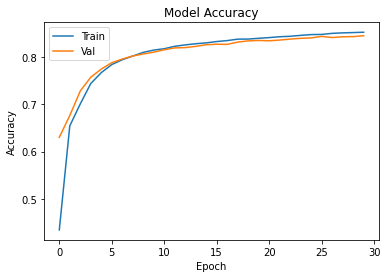

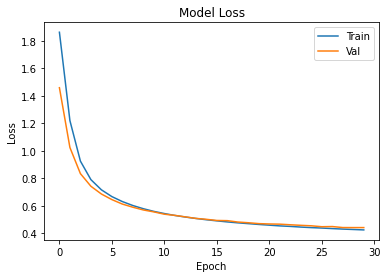

In [15]:
model= Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(Dense(512, activation="relu", kernel_initializer='glorot_uniform'))
model.add(Dense(128, activation="relu", kernel_initializer='glorot_uniform'))
model.add(Dense(32, activation="relu", kernel_initializer='glorot_uniform'))
model.add(Dense(10, activation="softmax", kernel_initializer='glorot_uniform'))
model.summary()

SGD = keras.optimizers.SGD(learning_rate=0.001, nesterov=True, momentum=0.1)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer= SGD,
              metrics =["accuracy"])

# Para utilizar el 20% para validación vamos a poner que realizen un split de 0,2
history_relu_glorot_SGD = model.fit(x_train,y_train, epochs=30, verbose=1, batch_size=64, validation_split=0.2)
plot_acc(history_relu_glorot_SGD)
plot_loss(history_relu_glorot_SGD)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_25 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_26 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_27 (Dense)             (None, 10)                330       
Total params: 472,042
Trainable params: 472,042
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
750/750 [==============================] - 5s 6ms/step - loss: 1.7353 - accuracy: 0.4686 - val_loss: 0.

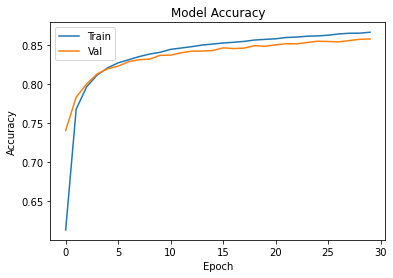

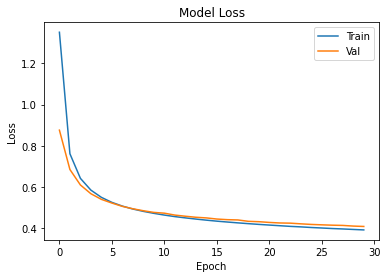

In [16]:
model= Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(Dense(512, activation="relu", kernel_initializer='glorot_uniform'))
model.add(Dense(128, activation="relu", kernel_initializer='glorot_uniform'))
model.add(Dense(32, activation="relu", kernel_initializer='glorot_uniform'))
model.add(Dense(10, activation="softmax", kernel_initializer='glorot_uniform'))
model.summary()

model.compile(loss="sparse_categorical_crossentropy",
              optimizer= 'Adagrad',
              metrics =["accuracy"])

# Para utilizar el 20% para validación vamos a poner que realizen un split de 0,2
history_relu_glorot_Adagrad = model.fit(x_train,y_train, epochs=30, verbose=1, batch_size=64, validation_split=0.2)
plot_acc(history_relu_glorot_Adagrad)
plot_loss(history_relu_glorot_Adagrad)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_29 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_30 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_31 (Dense)             (None, 10)                330       
Total params: 472,042
Trainable params: 472,042
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
750/750 [==============================] - 7s 8ms/step - loss: 0.8203 - accuracy: 0.7139 - val_loss: 0.

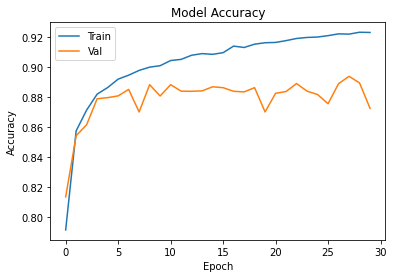

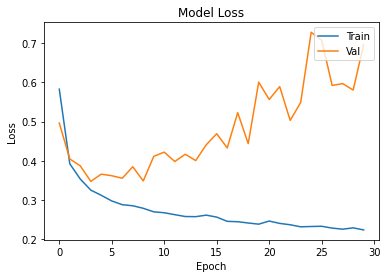

In [17]:
model= Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(Dense(512, activation="relu", kernel_initializer='glorot_uniform'))
model.add(Dense(128, activation="relu", kernel_initializer='glorot_uniform'))
model.add(Dense(32, activation="relu", kernel_initializer='glorot_uniform'))
model.add(Dense(10, activation="softmax", kernel_initializer='glorot_uniform'))
model.summary()

model.compile(loss="sparse_categorical_crossentropy",
              optimizer= 'RMSprop',
              metrics =["accuracy"])

# Para utilizar el 20% para validación vamos a poner que realizen un split de 0,2
history_relu_glorot_RMSprop = model.fit(x_train,y_train, epochs=30, verbose=1, batch_size=64, validation_split=0.2)
plot_acc(history_relu_glorot_RMSprop)
plot_loss(history_relu_glorot_RMSprop)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_33 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_34 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_35 (Dense)             (None, 10)                330       
Total params: 472,042
Trainable params: 472,042
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
750/750 [==============================] - 5s 6ms/step - loss: 0.6787 - accuracy: 0.7573 - val_loss: 0

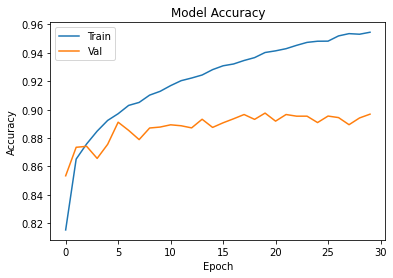

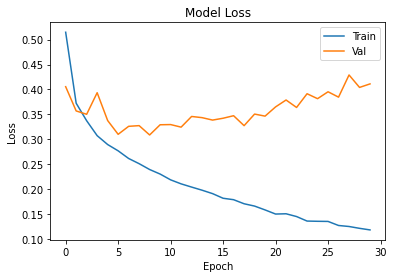

In [18]:
model= Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(Dense(512, activation="relu", kernel_initializer='glorot_uniform'))
model.add(Dense(128, activation="relu", kernel_initializer='glorot_uniform'))
model.add(Dense(32, activation="relu", kernel_initializer='glorot_uniform'))
model.add(Dense(10, activation="softmax", kernel_initializer='glorot_uniform'))
model.summary()

model.compile(loss="sparse_categorical_crossentropy",
              optimizer= 'Adam',
              metrics =["accuracy"])

# Para utilizar el 20% para validación vamos a poner que realizen un split de 0,2
history_relu_glorot_Adam = model.fit(x_train,y_train, epochs=30, verbose=1, batch_size=64, validation_split=0.2)
plot_acc(history_relu_glorot_Adam)
plot_loss(history_relu_glorot_Adam)

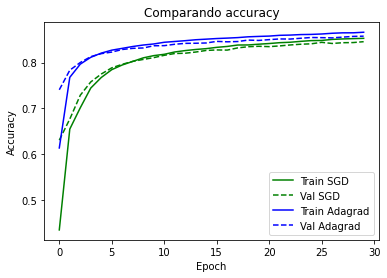

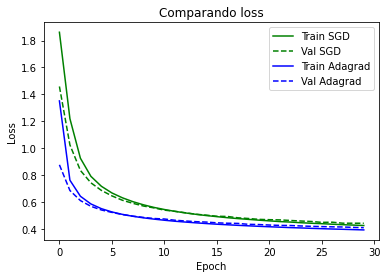

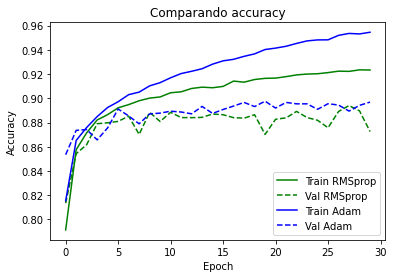

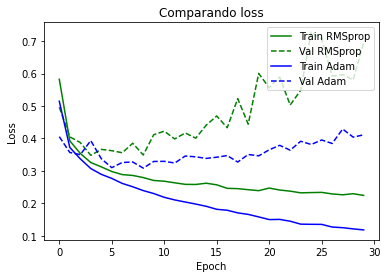

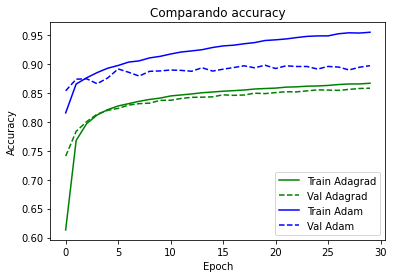

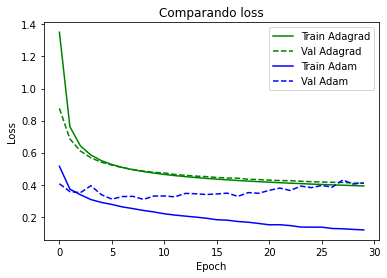

In [19]:
plot_compare_accs(history_relu_glorot_SGD,history_relu_glorot_Adagrad,name1='SGD', name2='Adagrad',title='Comparando accuracy')
plot_compare_losses(history_relu_glorot_SGD,history_relu_glorot_Adagrad,name1='SGD', name2='Adagrad',title='Comparando loss')

plot_compare_accs(history_relu_glorot_RMSprop,history_relu_glorot_Adam,name1='RMSprop', name2='Adam',title='Comparando accuracy')
plot_compare_losses(history_relu_glorot_RMSprop,history_relu_glorot_Adam,name1='RMSprop', name2='Adam',title='Comparando loss')

plot_compare_accs(history_relu_glorot_Adagrad,history_relu_glorot_Adam,name1='Adagrad', name2='Adam',title='Comparando accuracy')
plot_compare_losses(history_relu_glorot_Adagrad,history_relu_glorot_Adam,name1='Adagrad', name2='Adam',title='Comparando loss')

RMS_prop tiende a entrenarse demasiado a los datos de entrenamiento produciendo overfitting, el modelo Adam tiende a sobreentrenarse un poco, pero los otros dos modelos tienen un entrenamiento bastante correcto. Aun y todo se puede decir que los mejores datos son las que ha dado el modelo de Adam. Esto puede deberse a que los modelos de SGD y Adagrad no se han entrenado lo suficiente, por lo que habría que tener cuidado al elegir el algoritmo de entrenamiento.

## 4. Regularización y red final *(1.25 puntos)*

**Ejercicio 4.1**: Entrenar una red final que sea capaz de obtener una accuracy en el validation set cercana al 90%. Para ello, combinar todo lo aprendido anteriormente y utilizar técnicas de regularización para evitar overfitting. Algunos de los elementos que pueden tenerse en cuenta son los siguientes.

* Número de capas y neuronas por capa
* Optimizadores y sus parámetros
* Batch size
* Unidades de activación
* Uso de capas dropout, regularización L2, regularización L1...
* Early stopping (se puede aplicar como un callback de Keras, o se puede ver un poco "a ojo" cuándo el modelo empieza a caer en overfitting y seleccionar el número de epochs necesarias)
* Batch normalization

Si los modelos entrenados anteriormente ya se acercaban al valor requerido de accuracy, probar distintas estrategias igualmente y comentar los resultados.

Explicar brevemente la estrategia seguida y los modelos probados para obtener el modelo final, que debe verse entrenado en este Notebook. No es necesario guardar el entrenamiento de todos los modelos que se han probado, es suficiente con explicar cómo se ha llegado al modelo final.

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_38 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
1500/1500 [==============================] - 8s 5ms/step - loss: 0.7453 - accuracy: 0.7315 - val_loss:

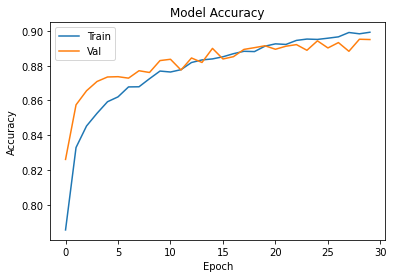

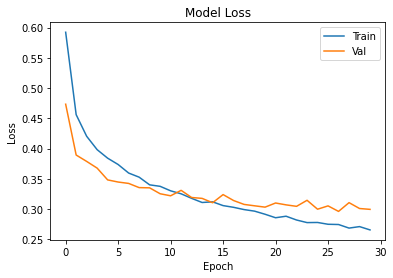

In [20]:
model= Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))
model.summary()

model.compile(loss="sparse_categorical_crossentropy",
              optimizer= 'Adam',
              metrics =["accuracy"])

# Para utilizar el 20% para validación vamos a poner que realizen un split de 0,2
history_relu_glorot_SGD_drop = model.fit(x_train,y_train, epochs=30, verbose=1, batch_size=32, validation_split=0.2)
plot_acc(history_relu_glorot_SGD_drop)
plot_loss(history_relu_glorot_SGD_drop)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense_39 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_40 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dense_41 (Dense)             (None, 10)              

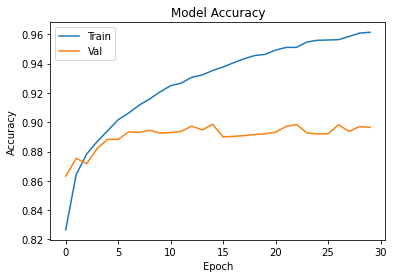

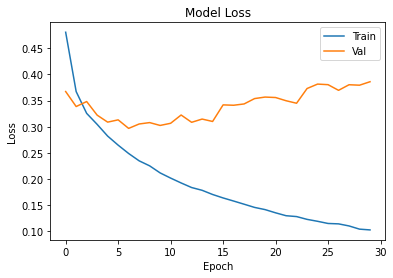

In [21]:
model= Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.BatchNormalization())
model.add(Dense(512, activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(Dense(128, activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(Dense(10, activation="softmax"))
model.summary()

model.compile(loss="sparse_categorical_crossentropy",
              optimizer= 'Adam',
              metrics =["accuracy"])

# Para utilizar el 20% para validación vamos a poner que realizen un split de 0,2
history_relu_glorot_Adam_batch = model.fit(x_train,y_train, epochs=30, verbose=1, batch_size=32, validation_split=0.2)
plot_acc(history_relu_glorot_Adam_batch)
plot_loss(history_relu_glorot_Adam_batch)

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_13 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_43 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_44 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
1500/1500 [==============================] - 10s 6ms/step - loss: 3.9304 - accuracy: 0.7370 - val_loss: 0.8439 - val_accuracy: 0.8123
Epoch 2/30
1500/1500 [==============================] - 9s 6ms/step - loss: 0.8125 - accuracy: 0.811

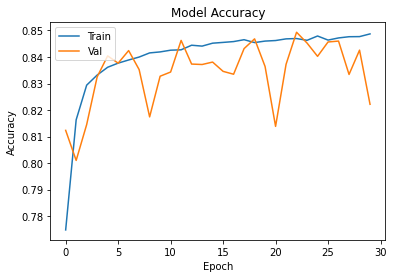

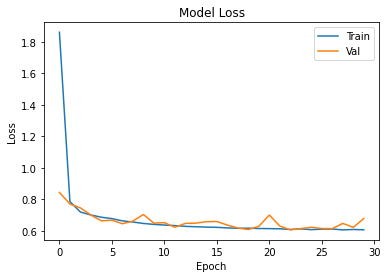

In [22]:
model= Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(Dense(512, activation="relu", kernel_initializer='glorot_uniform', kernel_regularizer=tf.keras.regularizers.l1(0.001)))
model.add(Dense(128, activation="relu", kernel_initializer='glorot_uniform', kernel_regularizer=tf.keras.regularizers.l1(0.001)))
model.add(Dense(10, activation="softmax", kernel_initializer='glorot_uniform'))
model.summary()

model.compile(loss="sparse_categorical_crossentropy",
              optimizer= 'Adam',
              metrics =["accuracy"])

# Para utilizar el 20% para validación vamos a poner que realizen un split de 0,2
history_relu_glorot_Adam_l1 = model.fit(x_train,y_train, epochs=30, verbose=1, batch_size=32, validation_split=0.2)
plot_acc(history_relu_glorot_Adam_l1)
plot_loss(history_relu_glorot_Adam_l1)

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_14 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_47 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
1500/1500 [==============================] - 10s 6ms/step - loss: 0.8118 - accuracy: 0.7355 - val_loss

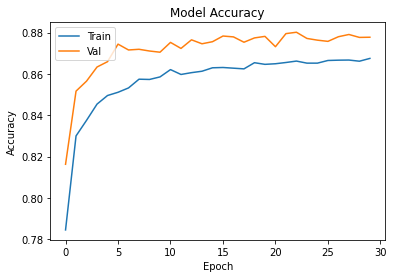

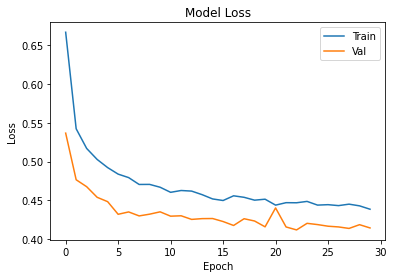

In [23]:
model= Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(Dense(512, activation="relu", kernel_initializer='glorot_uniform', kernel_regularizer=tf.keras.regularizers.l2(0.0001)))
model.add(Dropout(0.5))
model.add(Dense(128, activation="relu", kernel_initializer='glorot_uniform', kernel_regularizer=tf.keras.regularizers.l2(0.0001)))
model.add(Dense(10, activation="softmax", kernel_initializer='glorot_uniform'))
model.summary()

model.compile(loss="sparse_categorical_crossentropy",
              optimizer= 'Adam',
              metrics =["accuracy"])

# Para utilizar el 20% para validación vamos a poner que realizen un split de 0,2
history_relu_glorot_Adam_l2 = model.fit(x_train,y_train, epochs=30, verbose=1, batch_size=32, validation_split=0.2)
plot_acc(history_relu_glorot_Adam_l2)
plot_loss(history_relu_glorot_Adam_l2)

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_15 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_50 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
1500/1500 [==============================] - 12s 8ms/step - loss: 2.8822 - accuracy: 0.6914 - val_loss

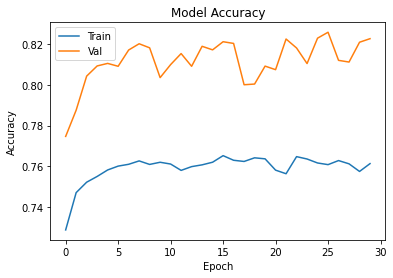

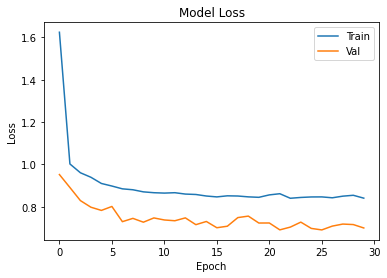

In [24]:
model= Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(Dense(512, activation="relu", kernel_initializer='glorot_uniform', kernel_regularizer=tf.keras.regularizers.l1_l2(0.0001)))
model.add(Dropout(0.5))
model.add(Dense(128, activation="relu", kernel_initializer='glorot_uniform', kernel_regularizer=tf.keras.regularizers.l1_l2(0.0001)))
model.add(Dense(10, activation="softmax", kernel_initializer='glorot_uniform'))
model.summary()

model.compile(loss="sparse_categorical_crossentropy",
              optimizer= 'Adam',
              metrics =["accuracy"])

# Para utilizar el 20% para validación vamos a poner que realizen un split de 0,2
history_relu_glorot_Adam_l1l2 = model.fit(x_train,y_train, epochs=30, verbose=1, batch_size=32, validation_split=0.2)
plot_acc(history_relu_glorot_Adam_l1l2)
plot_loss(history_relu_glorot_Adam_l1l2)

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_16 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_51 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_52 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_53 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
1500/1500 [==============================] - 8s 5ms/step - loss: 0.7467 - accuracy: 0.7284 - val_loss

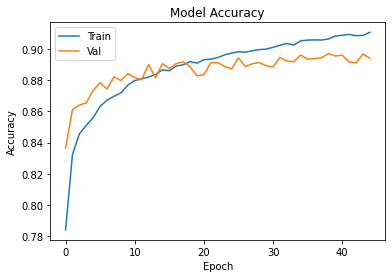

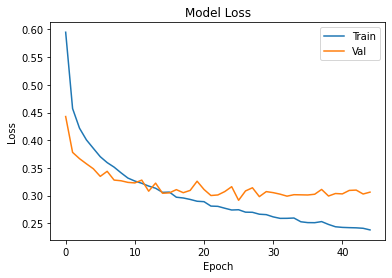

In [25]:
model= Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(Dense(512, activation="relu", kernel_initializer='glorot_uniform'))
model.add(Dropout(0.5))
model.add(Dense(128, activation="relu", kernel_initializer='glorot_uniform'))
model.add(Dense(10, activation="softmax", kernel_initializer='glorot_uniform'))
model.summary()

# Con esto definimos cuando queremos que deje d entrenar
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, min_delta=0.001, mode='max')

model.compile(loss="sparse_categorical_crossentropy",
              optimizer= 'Adam',
              metrics =["accuracy"])

# Para utilizar el 20% para validación vamos a poner que realizen un split de 0,2
history_relu_glorot_Adam_earstop1 = model.fit(x_train,y_train, epochs=200, verbose=1, batch_size=32, validation_split=0.2, callbacks=[early_stopping])
plot_acc(history_relu_glorot_Adam_earstop1)
plot_loss(history_relu_glorot_Adam_earstop1)

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_17 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_54 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_55 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
750/750 [==============================] - 4s 5ms/step - loss: 2.4868 - accuracy: 0.0889 - val_loss: 2.4401 - val_accuracy: 0.1002
Epoch 2/200
750/750 [==============================] - 4s 5ms/step - loss: 2.4209 - accuracy: 0.1020 - val_loss: 2.3843 - val_accuracy: 0.1128
Epoch 3/200
750/750 [==============================] - 4s 5ms/step - loss: 2.3678 - accurac

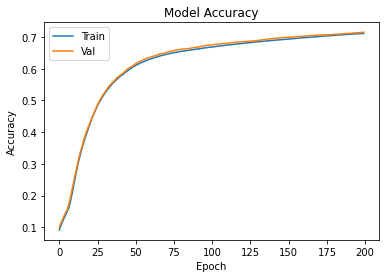

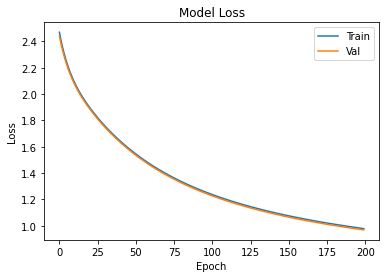

In [26]:
model= Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(Dense(512, activation="relu", kernel_initializer='glorot_uniform'))
model.add(Dense(10, activation="softmax", kernel_initializer='glorot_uniform'))
model.summary()

SGD = keras.optimizers.SGD(learning_rate=0.00001, nesterov=True, momentum=0.1)

# Con esto definimos cuando queremos que deje d entrenar
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, min_delta=0.001, mode='max', restore_best_weights=True)

model.compile(loss="sparse_categorical_crossentropy",
              optimizer= SGD,
              metrics =["accuracy"])

# Para utilizar el 20% para validación vamos a poner que realizen un split de 0,2
history_relu_glorot_Adam_earstop2 = model.fit(x_train,y_train, epochs=200, verbose=1, batch_size=64, validation_split=0.2, callbacks=[early_stopping])
plot_acc(history_relu_glorot_Adam_earstop2)
plot_loss(history_relu_glorot_Adam_earstop2)

Tras haber probado los distintos métodos de regularización, ha de decir que hay que entender bien como funcionan cada una de ellas ya que si metemos datos aleatorios puede que no funcionen correctamente. Eso es lo que ha pasado con regularización L2 y L1L2, que al meter un valor alfa aleatorio, no realizan su función correctamente, por lo que habría que probar con distintos valores. Por otro lado, el dropout hace que el entrenamiento sea más lento, pero a la vez que sea más eficaz y que las neuronas vayan aprendiendo de una manera más segura. Con el early stopping lo que logramos es parar el entrenamiento si los datos de validación no mejora o empeoran. Por último, aunque en este trabajo no haya utilizado, se puede poder early stopping con la opción de obtener los mejores valores obtenido durante el entrenamiento, como se puede ver en el último entrenamiento. Habiendo analizado todo esto, se procede a entrenar el modelo elegido.

### Evaluación del modelo en datos de test

Una vez elegido el que creemos que es nuestro mejor modelo a partir de la estimación que hemos visto en los datos de validación, es hora de utilizar los datos de test para ver cómo se comporta nuestro modelo ante nuevos datos. Si hemos hecho bien las cosas, este número debería ser parecido al valor de nuestra estimación vista en los datos de validación.

**Pregunta 4.2**. Utilizando nuestro mejor modelo, obtener la accuracy resultante en el dataset de test. Comentar este resultado.

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_18 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_56 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_57 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_58 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
1500/1500 [==============================] - 8s 5ms/step - loss: 0.7345 - accuracy: 0.7388 - val_loss

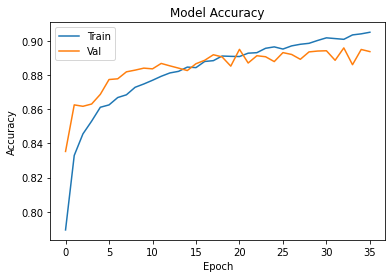

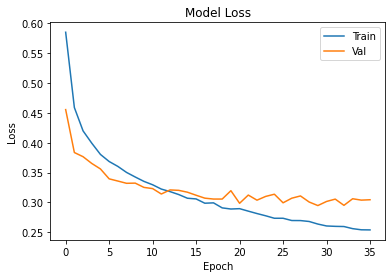

In [27]:
model_final= Sequential()
model_final.add(keras.layers.Flatten(input_shape=[28,28]))
model_final.add(Dense(512, activation="relu"))
model_final.add(Dropout(0.5))
model_final.add(Dense(128, activation="relu"))
model_final.add(Dense(10, activation="softmax"))
model_final.summary()

# Con esto definimos cuando queremos que deje d entrenar
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=15, min_delta=0.001, mode='max', restore_best_weights=True)


model_final.compile(loss="sparse_categorical_crossentropy",
              optimizer= 'Adam',
              metrics =["accuracy"])


# Para utilizar el 20% para validación vamos a poner que realizen un split de 0,2
history_relu_glorot_Adam_last = model_final.fit(x_train,y_train, epochs=200, verbose=1, batch_size=32, validation_split=0.2, callbacks=[early_stopping])
plot_acc(history_relu_glorot_Adam_last)
plot_loss(history_relu_glorot_Adam_last)

In [28]:
model_final.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3231 - accuracy: 0.8882


[0.32313746213912964, 0.8881999850273132]

Se puede ver que la precisión del modelo entrenado se parece a la de la validación. Aunque puede haber un cierto sobreentrenamiento, se puede decir que para ser un sistema para predecir imágenes con un "fully connected" funciona bastante bien. Es verdad que las imágenes a predecir no tienen mucha complicación y eso facilita el proceso de predicción.